In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

          Mean ($M)  Std Dev ($M)
Unhedged      13.20          0.81
Forward       13.20          0.00
Option        13.57          0.48


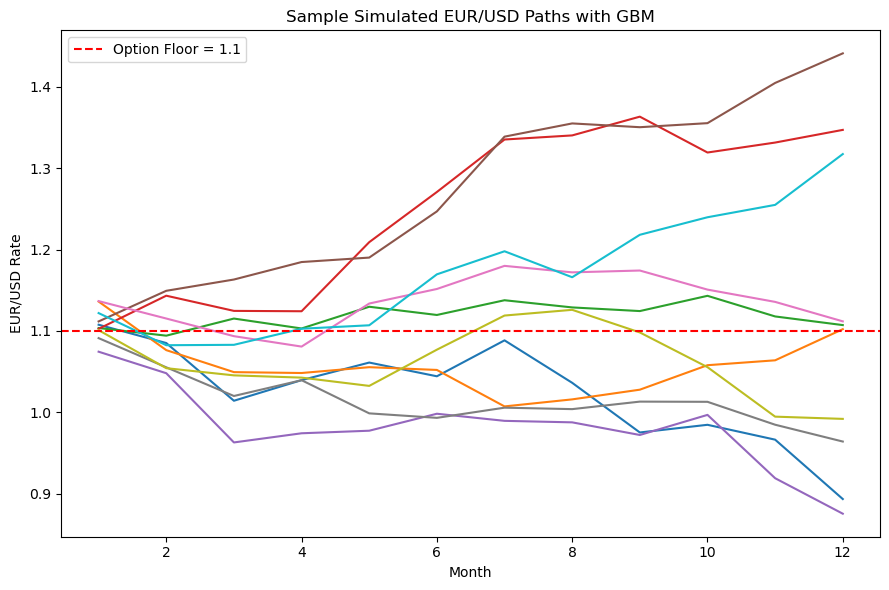

In [22]:
N = 10000 # no of simulations
T = 12 # Time Horizon
S0 = 1.1 # Starting exchange rate
vol = 0.1 # Annual Volatility
dt = 1/12
rand = np.random.normal(0, 1, (N, T))

# GBM simulation for 12 monthly steps
steps = np.exp(-0.5 * vol**2 * dt + vol * np.sqrt(dt) * rand)
rates = S0 * steps.cumprod(axis=1)
EUR = 1000000  # monthly EUR receivable

# Payoffs for each Strategy
unhedged = EUR * rates.sum(axis=1)
forward = EUR * S0 * T
option = EUR * np.maximum(rates, S0).sum(axis=1)

df = pd.DataFrame(results, index=["Mean ($M)", "Std Dev ($M)"]).T
print(df.round(2))


plt.figure(figsize=(9,6))
for i in range(10):
    plt.plot(range(1, T+1), rates[i], lw=1.5)
plt.axhline(y=S0, color='red', linestyle='--', label=f"Option Floor = {S0}")
plt.title("Sample Simulated EUR/USD Paths with GBM")
plt.xlabel("Month")
plt.ylabel("EUR/USD Rate")
plt.legend()
plt.tight_layout()
plt.show()



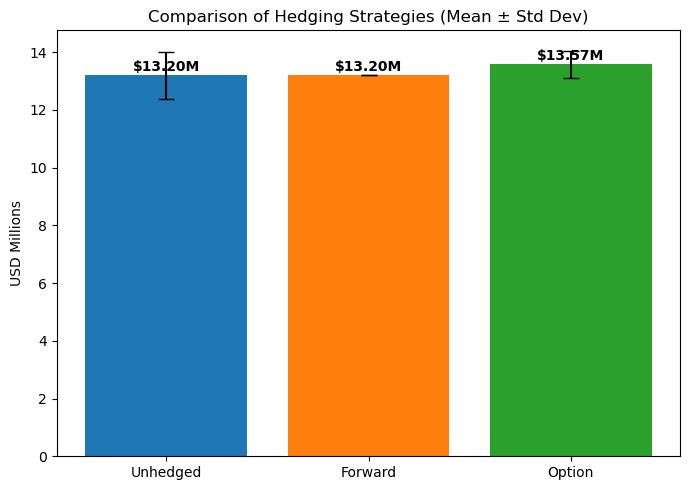

In [21]:
import matplotlib.pyplot as plt

# Extracting results
labels = list(results.keys())
means = [m for m, s in results.values()]
stds  = [s for m, s in results.values()]

plt.figure(figsize=(7,5))
bars = plt.bar(labels, means, yerr=stds, capsize=6, color=['#1f77b4','#ff7f0e','#2ca02c'])
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f"${mean:.2f}M", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylabel("USD Millions")
plt.title("Comparison of Hedging Strategies (Mean ± Std Dev)")
plt.tight_layout()
plt.show()